In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
%matplotlib inline 
pd.options.display.max_columns = 200 

In [3]:
top500DF = pd.read_csv("RollingStoneAlbumList.csv")



top500DF.groupby("Artist").count().sort_values("Album",ascending=False)

,Number,Year,Album,Genre,Subgenre
Artist,,,,,
The Beatles,10,10,10,10,10
Bob Dylan,10,10,10,10,10
The Rolling Stones,10,10,10,10,10
Bruce Springsteen,8,8,8,8,8
The Who,7,7,7,7,7
...,...,...,...,...,...
LaBelle,1,1,1,1,1
Lauryn Hill,1,1,1,1,1
Leonard Cohen,1,1,1,1,1


In [4]:
#How many albums does each artist have on the list?
top500DF.groupby("Artist").count().sort_values("Album",ascending=False)
# OR 
top500DF["Artist"].value_counts()

Bob Dylan             10
The Beatles           10
The Rolling Stones    10
Bruce Springsteen      8
The Who                7
                      ..
Patsy Cline            1
Neil Diamond           1
The Drifters           1
D'Angelo               1
Merle Haggard          1
Name: Artist, Length: 289, dtype: int64

In [5]:
# what albums to the beatles have on the list?
top500DF.query("Artist == 'The Beatles'")

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock,"Rock & Roll, Pop Rock, Psychedelic Rock, Exper..."
13,14,1969,Abbey Road,The Beatles,Rock,"Psychedelic Rock, Classic Rock, Pop Rock"
38,39,1963,Please Please Me,The Beatles,Rock,"Beat, Rock & Roll"
52,53,1964,Meet The Beatles!,The Beatles,Rock,"Beat, Rock & Roll"
306,307,1964,A Hard Day's Night,The Beatles,"Rock, Stage & Screen","Soundtrack, Beat, Pop Rock"
330,331,1965,Help!,The Beatles,"Rock, Stage & Screen","Beat, Soundtrack, Pop Rock"
391,392,1970,Let It Be,The Beatles,Rock,Pop Rock


In [6]:
# DOING SOMETHING TO AN ENTIRE COLUMN 
# apply()
# ^^^^ PRACTICE APPLY 
# 
top500DF["Primary Genre"] = top500DF["Genre"].apply(lambda x: x.split(",")[0])
top500DF["Primary Genre"].value_counts()

Rock           318
Funk / Soul     51
Electronic      45
Hip Hop         34
Jazz            19
Folk            13
Blues            9
Reggae           7
Pop              2
Latin            1
Classical        1
Name: Primary Genre, dtype: int64

In [8]:
# convert a series to a DF with to_frame
top500DF["Primary Genre"].value_counts().to_frame()

,Primary Genre
Rock,318
Funk / Soul,51
Electronic,45
Hip Hop,34
Jazz,19
Folk,13
Blues,9
Reggae,7
Pop,2
Latin,1


In [9]:
top500DF.head()
np.mean(top500DF["Year"])

1979.27

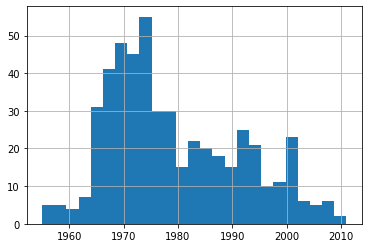

In [10]:
top500DF["Year"].hist(bins=25)

In [ ]:
# lets do some analysis to see if these old, snobby hipsters think that "their" music is the best 
# lets the albums rankings into account
# we want to see when the best albums 


In [22]:
#invert the rankings 
top500DF["Album Score"] = top500DF["Number"].apply(lambda x: 501-x)
yearGroupingScores = top500DF.groupby("Year").agg({"Album Score":sum}).sort_values("Album Score",ascending = False).reset_index()
yearGroupingScores

,Year,Album Score
0,1970,7728
1,1969,7045
2,1968,6839
3,1967,6534
4,1971,6309
5,1972,5767
6,1973,5426
7,1975,5275
8,1977,5188
9,1965,4517


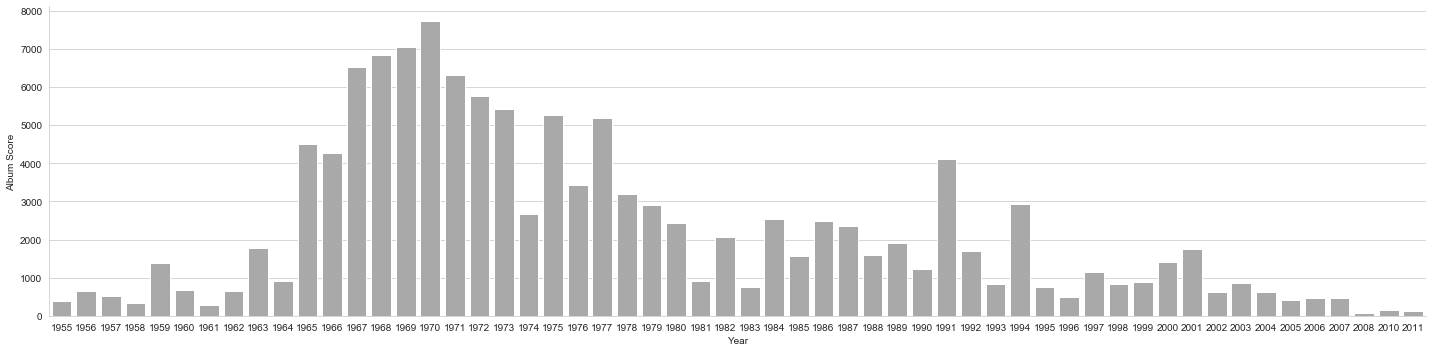

In [31]:
# Setting style for all seaborn graphs ---> white grid inserts gridlines for the y values 
sb.set_style("whitegrid")

sb.catplot(x="Year",y="Album Score",data=yearGroupingScores,kind='bar',aspect=4,color="darkgrey")

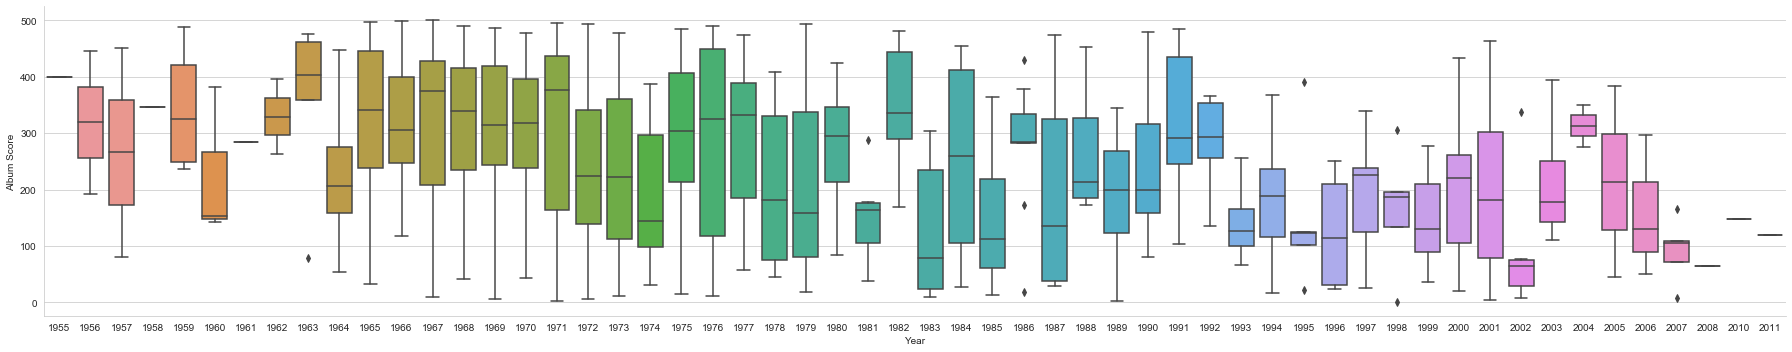

In [34]:
sb.catplot(x="Year",y="Album Score",data = top500DF,kind='box',aspect=5)

In [35]:
#Which artists have the highest cumlitive score 
top500DF.groupby("Artist").agg({"Album Score":sum}).sort_values("Album Score",ascending=False).reset_index()
top500DF.groupby("Year").agg({"Album Score":np.mean}).sort_values("Album Score",ascending=False).reset_index()
# lets look at artists carreer 


,Year,Album Score
0,1955,400.000000
1,1963,356.000000
2,1958,347.000000
3,1982,346.333333
4,1959,344.000000
5,1962,329.500000
6,1966,328.615385
7,1967,326.700000
8,1968,325.666667
9,1965,322.642857


In [38]:
#lets see what the highest rank album score pere year
maxScorePerYear = top500DF.groupby("Year").agg({"Album Score":max}).sort_values("Album Score",ascending= False).reset_index()
maxScorePerYear
sb.catplot(x="Year")

,Year,Album Score
0,1967,500
1,1966,499
2,1965,497
3,1971,495
4,1972,494
5,1979,493
6,1968,491
7,1976,490
8,1959,489
9,1969,487
